In [20]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
import seaborn as sns
import matplotlib.pyplot as plt

### Read Data

In [21]:
# Step 1: Load Train and Test Data
train_file_path = 'train_data.csv'
test_file_path = 'test_data.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

# Step 2: Separate Features and Target
target_column = train_data.columns[-1]  # Assuming the first column is the target
X_train = train_data.drop(columns=[target_column])
y_train = train_data[target_column]

X_test = test_data.drop(columns=[target_column])
y_test = test_data[target_column]

### Random Forest


In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the Random Forest model
rfc_model = RandomForestClassifier(random_state=42)

# Simplified parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4]  # Minimum samples required to be at a leaf node
}

# Perform GridSearchCV with simplified parameters
grid_search = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_rfc_model = grid_search.best_estimator_
rfc_predictions = best_rfc_model.predict(X_test)
rfc_probabilities = best_rfc_model.predict_proba(X_test)[:, 1] if len(y_test.unique()) == 2 else None

# Print test metrics
print("\nRandom Forest Classifier with Best Hyperparameters Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rfc_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rfc_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rfc_predictions, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, rfc_predictions, average='weighted'):.4f}")
if rfc_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, rfc_probabilities):.4f}")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best Cross-validation Accuracy: 0.9758479132759823

Random Forest Classifier with Best Hyperparameters Metrics:
Accuracy: 0.9792
Precision: 0.9796
Recall: 0.9792
F1-Score: 0.9792
AUC-ROC: 0.9988


### Logistic Regression

In [32]:

# Print test metrics


print("\nRandom Forest Classifier with Best Hyperparameters Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rfc_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rfc_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, rfc_predictions, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, rfc_predictions, average='weighted'):.4f}")
if rfc_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, rfc_probabilities):.4f}")



Random Forest Classifier with Best Hyperparameters Metrics:
Accuracy: 0.9792
Precision: 0.9796
Recall: 0.9792
F1-Score: 0.9792
AUC-ROC: 0.9988


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization type (L1 or L2)
    'solver': ['lbfgs', 'liblinear'],  # Solvers for optimization
    'max_iter': [100, 200, 500, 1000]  # Number of iterations to converge
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_lr_model = grid_search.best_estimator_
lr_predictions = best_lr_model.predict(X_test)
lr_probabilities = best_lr_model.predict_proba(X_test)[:, 1] if len(y_test.unique()) == 2 else None

# Print test metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\nLogistic Regression with Best Hyperparameters Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Precision: {precision_score(y_test, lr_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, lr_predictions, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_predictions, average='weighted'):.4f}")
if lr_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, lr_probabilities):.4f}")


c:\Users\henri\anaconda3\envs\IntelSis\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\henri\anaconda3\envs\IntelSis\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\henri\anaconda3\envs\IntelSis\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\henri\anaconda3\envs\IntelSis\Lib\site-packages\sklearn\l

Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.8986559848843718

Logistic Regression with Best Hyperparameters Metrics:
Accuracy: 0.9042
Precision: 0.9044
Recall: 0.9042
F1-Score: 0.9042
AUC-ROC: 0.9588


c:\Users\henri\anaconda3\envs\IntelSis\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### SVM

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define the SVM model
svm_model = SVC(random_state=42)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf'],  # Using RBF kernel
    'class_weight': [None, 'balanced']  # Weighting classes to handle imbalance
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_svm_model = grid_search.best_estimator_
svm_predictions = best_svm_model.predict(X_test)
svm_probabilities = best_svm_model.decision_function(X_test) if len(y_test.unique()) == 2 else None

# Print test metrics
print("\nSVM with Best Hyperparameters Metrics:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")
print(f"Precision: {precision_score(y_test, svm_predictions, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, svm_predictions, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, svm_predictions, average='weighted'):.4f}")
if svm_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, svm_probabilities):.4f}")


Best Parameters: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.862284341712091

SVM with Best Hyperparameters Metrics:
Accuracy: 0.8773
Precision: 0.8807
Recall: 0.8773
F1-Score: 0.8770
AUC-ROC: 0.9381


### Plots


Logistic Regression Metrics:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90
AUC-ROC: 0.96

Random Forest Classifier Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
AUC-ROC: 1.00

Support Vector Machine (SVM) Metrics:
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1-Score: 0.88
AUC-ROC: 0.94


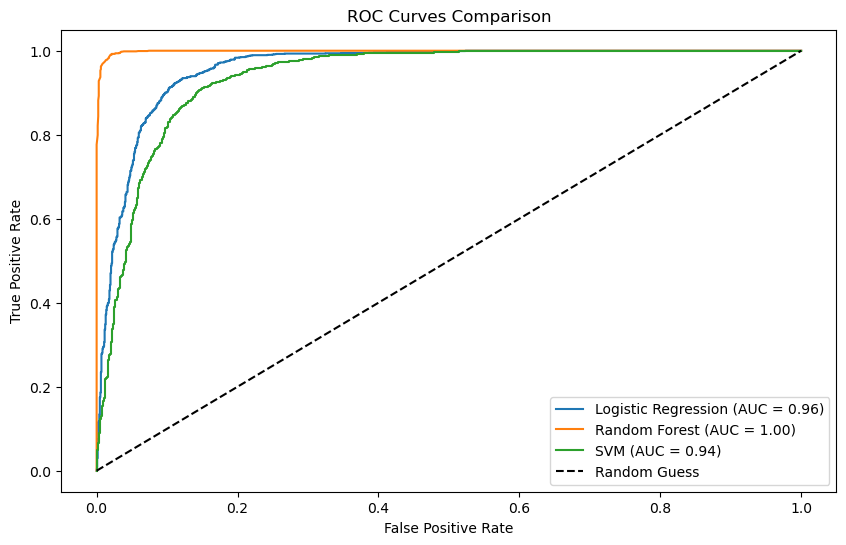

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming that `lr_model`, `rfc_model`, and `svm_model` have been trained previously
# and that `lr_predictions`, `rfc_predictions`, and `svm_predictions` are the predictions for X_test.
# Similarly, `lr_probabilities`, `rfc_probabilities`, and `svm_probabilities` should be available.

# Print metrics for Logistic Regression
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, lr_predictions):.2f}")
print(f"Precision: {precision_score(y_test, lr_predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, lr_predictions, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, lr_predictions, average='weighted'):.2f}")
if lr_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, lr_probabilities):.2f}")

# Print metrics for Random Forest
print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(y_test, rfc_predictions):.2f}")
print(f"Precision: {precision_score(y_test, rfc_predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, rfc_predictions, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, rfc_predictions, average='weighted'):.2f}")
if rfc_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, rfc_probabilities):.2f}")

# Print metrics for Support Vector Machine (SVM)
print("\nSupport Vector Machine (SVM) Metrics:")
print(f"Accuracy: {accuracy_score(y_test, svm_predictions):.2f}")
print(f"Precision: {precision_score(y_test, svm_predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, svm_predictions, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, svm_predictions, average='weighted'):.2f}")
if svm_probabilities is not None:
    print(f"AUC-ROC: {roc_auc_score(y_test, svm_probabilities):.2f}")

# Optional: Plot ROC Curves (Binary Classification Only)
if lr_probabilities is not None and rfc_probabilities is not None and svm_probabilities is not None:
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)
    rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probabilities)
    svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probabilities)

    # Plot all ROC curves in the same figure
    plt.figure(figsize=(10, 6))
    plt.plot(lr_fpr, lr_tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, lr_probabilities)))
    plt.plot(rfc_fpr, rfc_tpr, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rfc_probabilities)))
    plt.plot(svm_fpr, svm_tpr, label="SVM (AUC = {:.2f})".format(roc_auc_score(y_test, svm_probabilities)))
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title("ROC Curves Comparison")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
